#  </span> <span style="color:red"> LEZIONE 08  </span>
    
## ESERCIZIO 08.1
    
### Metodi variazionali per la stima del *ground state* di una particella sottoposta ad un potenziale 1D 

Stima dei parametri $\mu$ e $\sigma$ che minimizzano l'energia di uno stato di prova $$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}.
$$

Vengono generate in modo casuale $2\times 10^3$ coppie di parametri $\mu$ e $\sigma$. Dopo di che, per ogni coppia di parametri, viene campionata una distribuzione di probabilità $|\Psi_T(x)|^2$ tramite algoritmo di Metropolis uniforme ($10^4$ passi) e successivamente stimanata l'energia media tramite tecnica di datablocking con $10^2$ blocchi. Ad ogni coppia di parametri viene associato il valore di energia relativo all'ultimo blocco. 

Le energie relative all'ultimo blocco vengono poi ordinate in ordine crescente nel file output e viene stampato il valore minore di energia con i rispettivi parametri.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=[8, 5]

e, sigma, mu = np.loadtxt("./Exercise_8.1/Output/Minimization.txt", usecols=(0,1,2), unpack='true')
print("Energia minima =", e[0])
print()
print("\N{greek small letter sigma} =", sigma[0])
print()
print("\N{greek small letter mu} =", mu[0])

Energia minima = -0.431358

σ = 0.651382

μ = 0.81134


## ESERCIZIO 08.2
    
### Stima dell'energia media e grafico della distribuzione campionata

Stima dell'energia media e del suo errore a fissati valori di $\mu$ e $\sigma$ in funzione del numero di blocchi $M=10^2$.

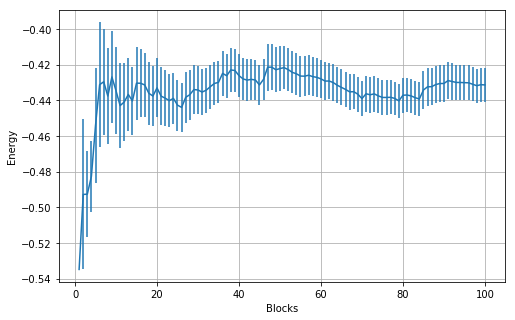

In [2]:
x, f, error = np.loadtxt("./Exercise_8.1/Output/Energy.txt", usecols=(0,1,2), unpack='true')

plt.errorbar(x,f,yerr=error)
plt.xlabel('Blocks')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

Istogramma (normalizzato) dei punti campionati tramite l'algoritmo di Metropolis con i parametri di cui sopra. Nel grafico vengono riportate anche la soluzione analitica, cioè la $|\Psi_T(x)|^2$ con i parametri considerati, e la soluzione ottenuta tramite rappresentazione matriciale dell'equazione di Schroedinger.

/home/andrea/miniconda3/envs/idp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


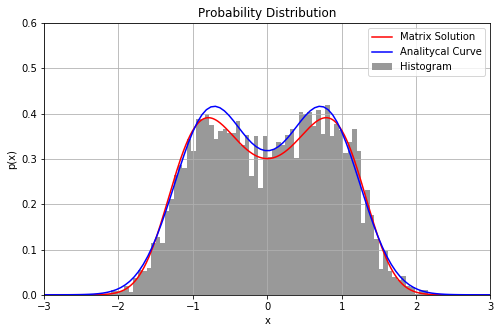

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n_bins = 100
y=np.linspace(-3,3,100) 
x = np.loadtxt("./Exercise_8.1/Output/Isto.txt", usecols=(0), unpack='true')
m=mu[0]
s=sigma[0]
norm=(2*np.pi*s**2)
g_1=(y-m)**2/(2*s**2)
g_2=(y+m)**2/(2*s**2)
f=(np.exp(-g_1)+np.exp(-g_2))*(np.exp(-g_1)+np.exp(-g_2))/norm

def Vpot(z):
    return (z**2 - 2.5)*z**2

hbar = 1
m_ = 1
a = 10
N = 1000 # number of iterations

z = np.linspace(-a/2, a/2, N)
dz = z[1] - z[0] 
V = Vpot(z)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m_*dz**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dz)

plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(z,(psi[0])**2, label='Matrix Solution', color='r')


plt.hist(x, n_bins, range=(-3,3), normed=True, label='Histogram', color='0.60')
plt.plot(y,f, label='Analitycal Curve', color='b')  

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Probability Distribution')

plt.legend(loc='upper right')
plt.xlim((-3,3))
plt.ylim((0,0.6))
plt.grid(True)
plt.show()


## Esercizio 08.3

### Path Integral MC

Usando il *Path Integram Monte Carlo* provo a replicare la ricerca del *ground state*. 

Nel grafico viene riportata la distribuzione di probabilità e viene confrontata con l'istogramma ottenuto tramite i metodi variazionali.

/home/andrea/miniconda3/envs/idp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


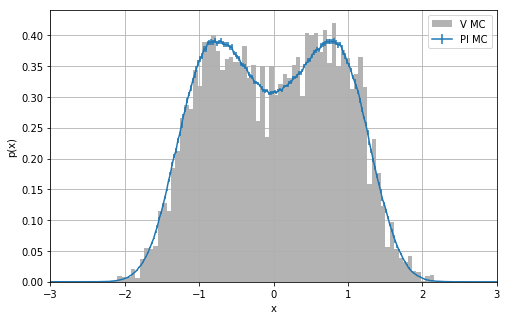

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("./Exercise_8.2/probability.dat", usecols=(0,1,2), unpack='true')

n_bins = 100
y=np.linspace(-3,3,100) 
y = np.loadtxt("./Exercise_8.1/Output/Isto.txt", usecols=(0), unpack='true')
plt.hist(y, n_bins, range=(-3,3), normed=True, color='0.7', label='V MC')
plt.errorbar(x,f,yerr=error, label='PI MC')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim((-3,3))
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

Grafico dell'Energia potenziale, cinetica e totale.

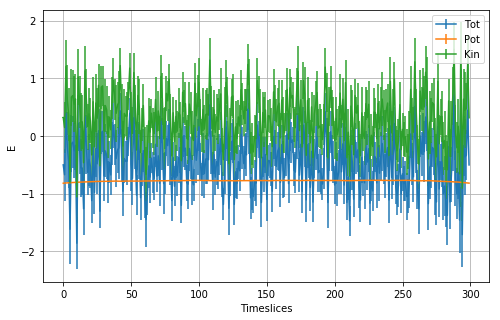

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error_k = np.loadtxt("./Exercise_8.2/kinetic.dat", usecols=(0,1,2), unpack='true')
y, g, error_p = np.loadtxt("./Exercise_8.2/potential.dat", usecols=(0,1,2), unpack='true')

plt.errorbar(x,f+g,yerr=np.sqrt(error_k**2+error_p**2), label='Tot')
plt.errorbar(y,g,yerr=error_p, label='Pot')
plt.errorbar(x,f,yerr=error_k, label='Kin')
plt.legend(loc='upper right')
plt.xlabel('Timeslices')
plt.ylabel('E')
plt.grid(True)
plt.show()